<a href="https://colab.research.google.com/github/koushik1207/ML-and-AI-projects/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name: Koushik Sai Venkataramanan


#### Step 1: Installing Required libraries.

In [ ]:
!pip install mpl_finance
!pip install yfinance

     |████████████████████████████████| 5.5MB 11.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22615 sha256=faed8e02a2dfe6708aa501d139d8c177d9c42b20588e4b359de7fd1ac1dda757
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas
import yfinance as yf

#### Downloading dataset weekly for the first visualization

In [ ]:
tesla_data = yf.download('AAPL',start='2019-12-08',end='2020-12-07',interval='1wk',progress=False)

In [ ]:
tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-09,67.500000,68.824997,66.227501,68.787498,68.198540,568117600.0
2019-12-16,69.250000,70.662498,69.245003,69.860001,69.261856,732720000.0
2019-12-23,70.132500,73.492500,70.092499,72.449997,71.829674,386438000.0
2019-12-30,72.364998,75.150002,71.305000,74.357498,73.720840,526723200.0
2020-01-06,73.447502,78.167503,73.187500,77.582497,76.918221,670091600.0


In [ ]:
tesla_data.shape

(57, 6)

In [ ]:
tesla_data = tesla_data.dropna()

In [ ]:
tesla_data.shape

(52, 6)

In [ ]:
import mpl_finance
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### 1. Plot the data of the stock closing price using matplotlib highlighting the 52 week high and 52 week low.

Text(0, 0.5, 'Price')

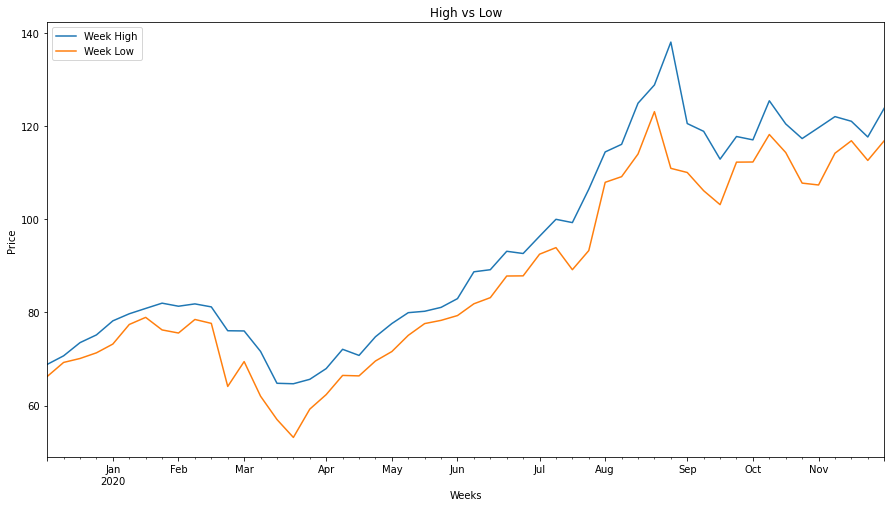

In [ ]:
tesla_data["High"].plot(figsize=(15,8),label="Week High")
tesla_data["Low"].plot(figsize=(15,8),label="Week Low")
plt.legend(loc="upper left")                                  
plt.title("High vs Low")
plt.xlabel("Weeks")
plt.ylabel("Price")

In [ ]:
tesla_data =tesla_data.reset_index()

In [ ]:
tesla_data.rename(columns = {0:'Date'},inplace=True)

In [ ]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

data_candle = tesla_data.loc[:, ['Date','Open', 'High', 'Low', 'Close']]
data_candle['Date'] = pd.to_datetime(data_candle['Date'])
data_candle['Date'] = data_candle['Date'].apply(mpl_dates.date2num)
data_candle = data_candle.astype(float)

fig, ax = plt.subplots(figsize = (15,8))


candlestick_ohlc(ax, data_candle.values, width=1.6, colorup='blue', colordown='red', alpha=0.8)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of Tesla Stocks')

date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

NameError: ignored

#### Downloading dataset with 1 entire year's data. This gives us a dataset with the entire year's business days open, close,volume, adj close.

### CandleStick representation of the stocks

In [ ]:
tesla_data_1  = yf.download('TSLA',start='2019-12-08',end='2020-12-07',progress=False)

In [ ]:
type(tesla_data_1)

pandas.core.frame.DataFrame

In [ ]:
tesla_data = yf.download('TSLA',start='2019-12-08',end='2020-12-07',interval='1wk',progress=False)

In [ ]:
k = tesla_data_1.reset_index()
print(k)

          Date        Open        High  ...       Close   Adj Close    Volume
0   2019-12-09   67.318001   68.889999  ...   67.905998   67.905998  45115500
1   2019-12-10   67.991997   70.146004  ...   69.767998   69.767998  44141500
2   2019-12-11   70.375999   71.438004  ...   70.540001   70.540001  34489000
3   2019-12-12   70.984001   72.547997  ...   71.935997   71.935997  38819500
4   2019-12-13   72.209999   73.042000  ...   71.678001   71.678001  32854500
..         ...         ...         ...  ...         ...         ...       ...
246 2020-11-30  602.210022  607.799988  ...  567.599976  567.599976  63003100
247 2020-12-01  597.590027  597.849976  ...  584.760010  584.760010  40382800
248 2020-12-02  556.440002  571.539978  ...  568.820007  568.820007  47775700
249 2020-12-03  590.020020  598.969971  ...  593.380005  593.380005  42552000
250 2020-12-04  591.010010  599.039978  ...  599.039978  599.039978  29401300

[251 rows x 7 columns]


#### Now, while examining the dataset, we infer that there are few days linke December 25th, January 1st as holidays. They are not considered as business days, but should be taken into consideration. We cannot just split them into 5 days per week and find the counter. Instead, we create a dataframe with the holidays and then fill them with empty values and then group them weekly to obtain proper data.

In [ ]:
import pandas as pd
import datetime as datetime
df =pd.DataFrame()
start_date = datetime.datetime(year = 2019,month = 12,day = 8)
end_date = datetime.datetime(year = 2020,month = 12,day = 7)
df["Dates"] = pd.date_range(start_date,end_date)

In [ ]:
print(str(k["Date"][0]))#.split()[0])

2019-12-09 00:00:00


In [ ]:
import holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start='2019-12-08',end='2020-12-07')
holidays

DatetimeIndex(['2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17',
               '2020-05-25', '2020-07-03', '2020-09-07', '2020-10-12',
               '2020-11-11', '2020-11-26'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
holi = pd.DataFrame(holidays)

In [ ]:
holi.insert(1,"Open",[0]*10,True)
holi.insert(2,"High",[0]*10,True)
holi.insert(3,"Low",[0]*10,True)
holi.insert(4,"Close",[0]*10,True)
holi.insert(5,"Adj Close",[0]*10,True)
holi.insert(6,"Volume",[0]*10,True)

In [ ]:
holi.rename(columns = {0:'Date'},inplace=True)

In [ ]:
holi

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-25,0,0,0,0,0,0
1,2020-01-01,0,0,0,0,0,0
2,2020-01-20,0,0,0,0,0,0
3,2020-02-17,0,0,0,0,0,0
4,2020-05-25,0,0,0,0,0,0
5,2020-07-03,0,0,0,0,0,0
6,2020-09-07,0,0,0,0,0,0
7,2020-10-12,0,0,0,0,0,0
8,2020-11-11,0,0,0,0,0,0
9,2020-11-26,0,0,0,0,0,0


In [ ]:
k = k.append(holi)

In [ ]:
k = k.sort_values(by='Date')

In [ ]:
k = k.astype(int)

#### Groupby function in pandas: This function provided by pandas is homonymous to the GROUP BY function in SQL. It provides us the basic operation of finding insights in structured data to help us answer questions where few aspects are grouped together. 

## 2. Group the days when the integer price for the stock was the same. For example: if the closing price for the week is 300.50, 300.90, 302.20, 303.50, 303.80 then the group will be (300: 2, 302:1 , 303:2), and plot a bar graph for the above information.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


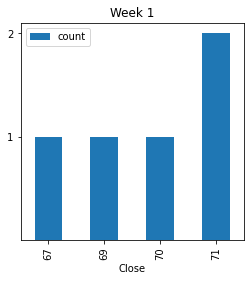

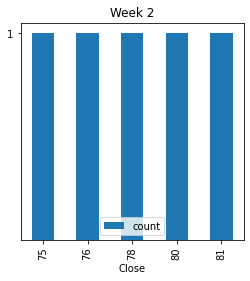

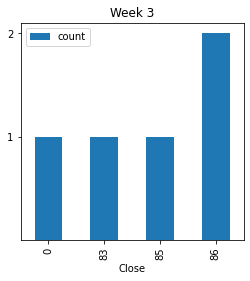

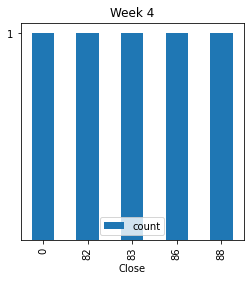

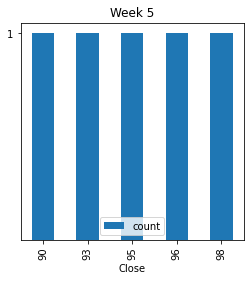

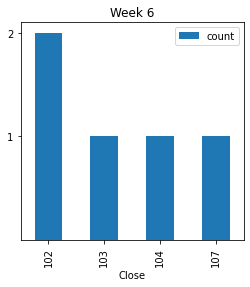

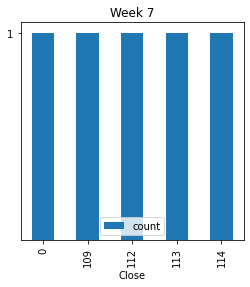

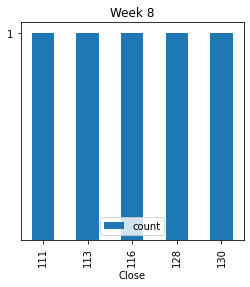

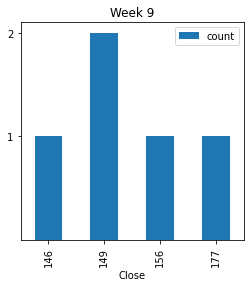

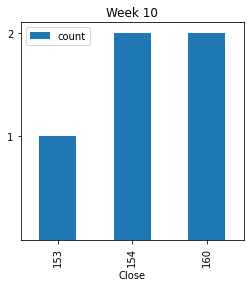

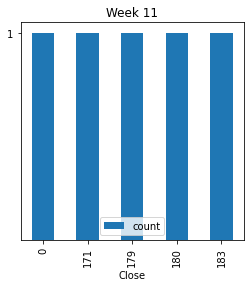

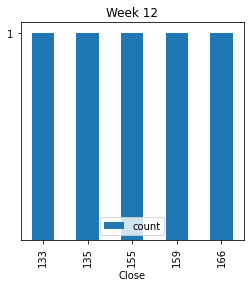

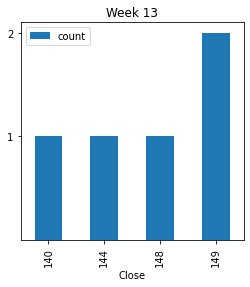

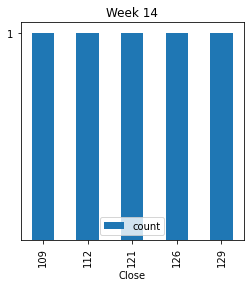

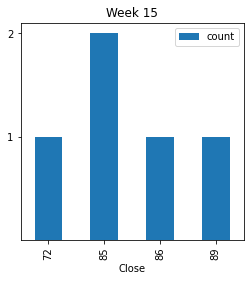

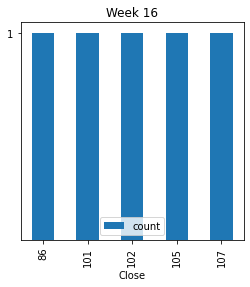

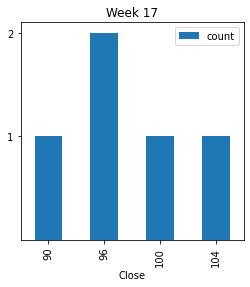

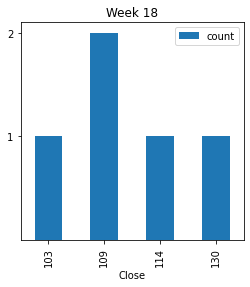

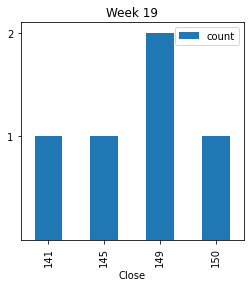

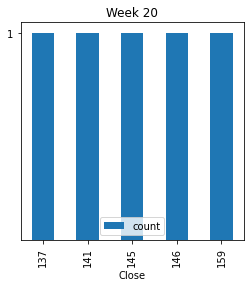

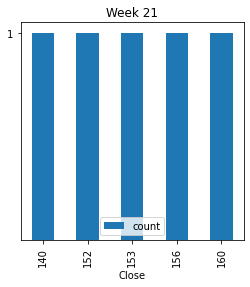

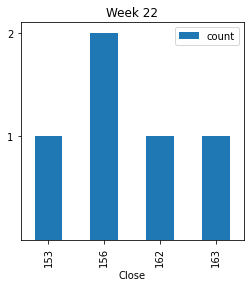

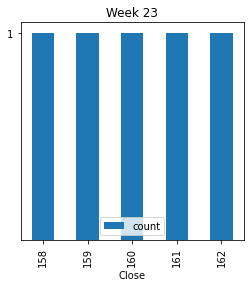

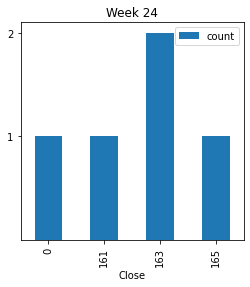

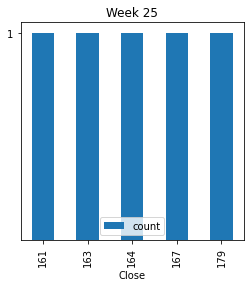

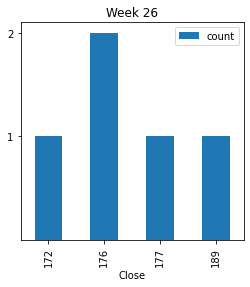

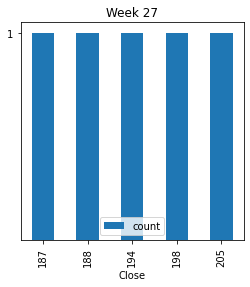

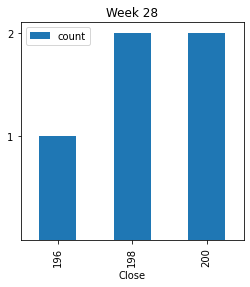

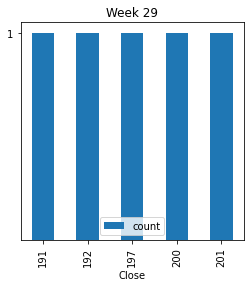

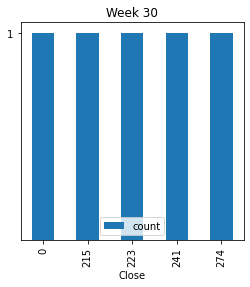

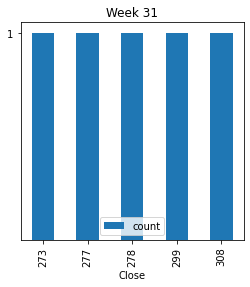

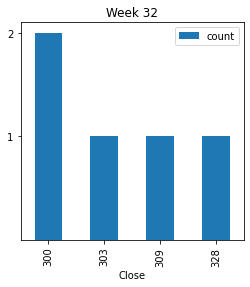

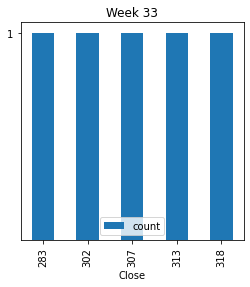

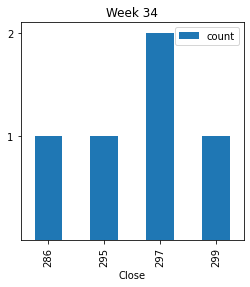

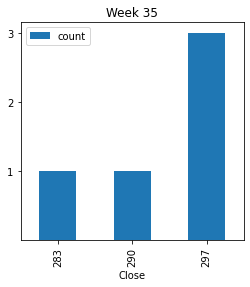

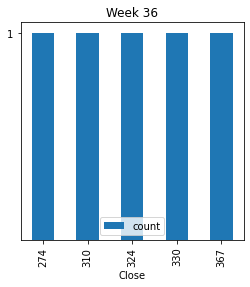

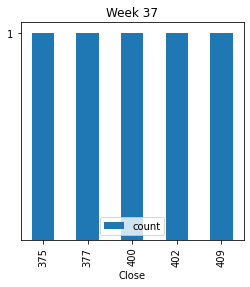

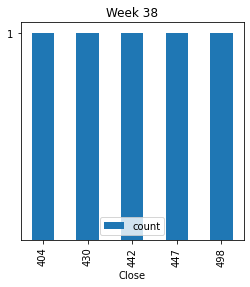

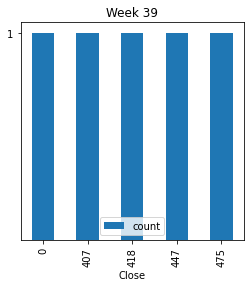

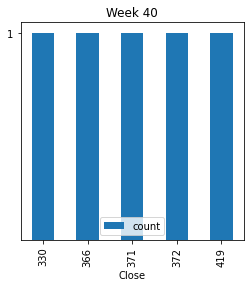

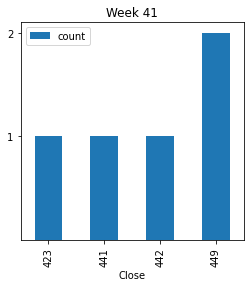

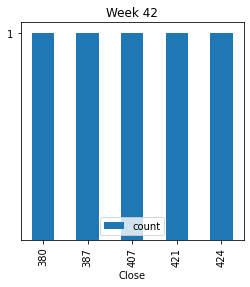

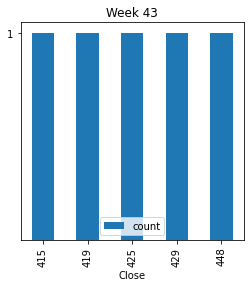

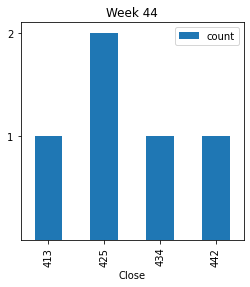

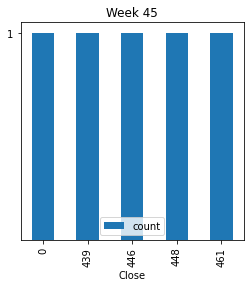

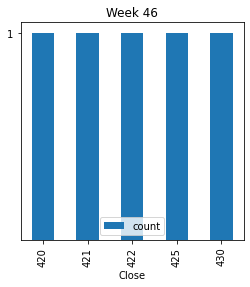

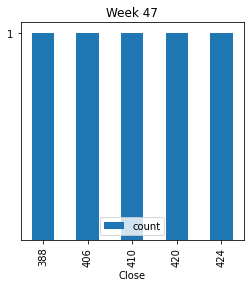

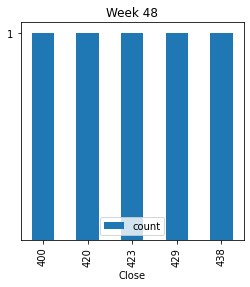

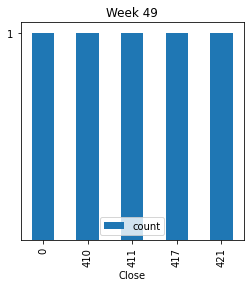

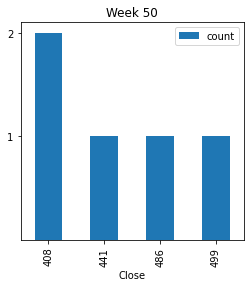

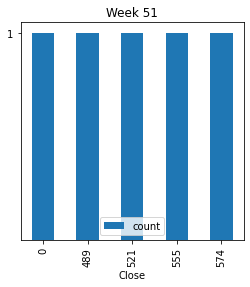

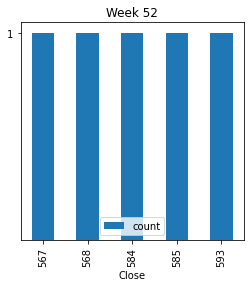

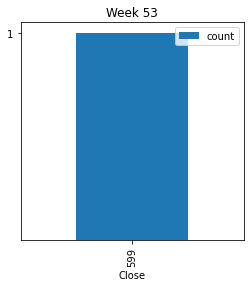

In [ ]:
weekno = 1
for i in range(0,len(k),5):
  plotting = pd.DataFrame()
  frame = (k.iloc[i:i+5].groupby(["Close"])["Close"].count().reset_index(name="count"))
  frame.plot(x ="Close",kind='bar', subplots=True, figsize=(4, 4))
  plt.yticks(range(min(frame["count"]), max(frame["count"])+1)) 
  plt.title("Week "+str(weekno))
  weekno +=1 

### Insights: 
#### **1 – Weekly profits:** People who want quicker profits will look upon the weekly and daily stats and this chart as part of task 2 gives us a better insight than the original dataset itself.
#### **2 –** This also helps us identify a range in which we can invest of the frequency of a stock price hits a particular price twice or more in a week, then it is advisable that given the week_low, week_high and close_price_frequency, we can decide a particular range if price within which we can invest and obtain maximum profits quickly i.e. short terms goals. For example, in week 1, we can infer that the stock price hit 71 twice, which can help us decide that we should buy at any price lesser than 71 preferably week_low of 67 to obtain maximum profits.

### Now, to get a clearer picture on how the trends will be in the future, we predict the prices with the yearly data. 

In [ ]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [ ]:
def to_sequences(seq_size, data, label):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        print(i)
        window = data[i:(i+seq_size)].values
        after_window = label[i+seq_size]
        print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [ ]:
data_set = tesla_data_1.copy()

In [ ]:
data_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-09,67.318001,68.889999,67.015999,67.905998,67.905998,45115500
2019-12-10,67.991997,70.146004,67.862000,69.767998,69.767998,44141500
2019-12-11,70.375999,71.438004,70.218002,70.540001,70.540001,34489000
2019-12-12,70.984001,72.547997,70.646004,71.935997,71.935997,38819500
2019-12-13,72.209999,73.042000,70.928001,71.678001,71.678001,32854500
...,...,...,...,...,...,...
2020-11-30,602.210022,607.799988,554.510010,567.599976,567.599976,63003100
2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40382800
2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700


## Dataset Pre-processing

In [ ]:
data_set.drop("Adj Close",axis = 1,inplace = True)
close_set=data_set[["Close"]]
encode_numeric_zscore(data_set,"Open")
encode_numeric_zscore(data_set,"Low")
encode_numeric_zscore(data_set,"High")
encode_numeric_zscore(data_set,"Volume")

In [ ]:
split_70 = int(len(data_set)* 0.70)
split_30 = len(data_set) - split_70
print(split_70)
print(split_30)
train = data_set[0:split_70]
test = data_set[split_70:len(data_set)]
train_close = close_set[0:split_70].values
test_close = close_set[split_70:len(data_set)].values

175
76


In [ ]:
x_train,y_train = to_sequences(5,train,train_close)
x_test,y_test = to_sequences(5,test,test_close)

0
[[-1.27306629 -1.28125471 -1.25970814 67.90599823 -0.40247846]
 [-1.26837721 -1.27271582 -1.25365127 69.76799774 -0.42453157]
 [-1.25179139 -1.26393221 -1.23678367 70.54000092 -0.64308157]
 [-1.24756144 -1.25638597 -1.23371944 71.93599701 -0.54503124]
 [-1.23903201 -1.25302751 -1.2317005  71.6780014  -0.68008959]] - [76.30000305]
1
[[-1.26837721 -1.27271582 -1.25365127 69.76799774 -0.42453157]
 [-1.25179139 -1.26393221 -1.23678367 70.54000092 -0.64308157]
 [-1.24756144 -1.25638597 -1.23371944 71.93599701 -0.54503124]
 [-1.23903201 -1.25302751 -1.2317005  71.6780014  -0.68008959]
 [-1.23694485 -1.22800917 -1.22044591 76.30000305  0.63350852]] - [75.79799652]
2
[[-1.25179139 -1.26393221 -1.23678367 70.54000092 -0.64308157]
 [-1.24756144 -1.25638597 -1.23371944 71.93599701 -0.54503124]
 [-1.23903201 -1.25302751 -1.2317005  71.6780014  -0.68008959]
 [-1.23694485 -1.22800917 -1.22044591 76.30000305  0.63350852]
 [-1.21406984 -1.22543937 -1.20125868 75.79799652 -0.46206036]] - [78.62999725

## Importing all the required libraries

In [ ]:
import os
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout


from keras.preprocessing import sequence
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [ ]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm_1.hdf5", verbose=1, save_best_only=True)

In [ ]:
for i in range(2):
    print(i)
    
    print('Build model...')
    model_lstm = Sequential()

    model_lstm.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(5, 5),activation="relu"))
    model_lstm.add(Dense(32, activation="relu"))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm.load_weights('./best_weights_lstm_1.hdf5')

0
Build model...
Train...
Epoch 1/10

Epoch 00001: val_loss improved from inf to 174709.01562, saving model to ./best_weights_lstm_1.hdf5
6/6 - 0s - loss: 33838.7461 - val_loss: 174709.0156
Epoch 2/10

Epoch 00002: val_loss improved from 174709.01562 to 155065.29688, saving model to ./best_weights_lstm_1.hdf5
6/6 - 0s - loss: 29580.5820 - val_loss: 155065.2969
Epoch 3/10

Epoch 00003: val_loss improved from 155065.29688 to 134584.57812, saving model to ./best_weights_lstm_1.hdf5
6/6 - 0s - loss: 25662.9355 - val_loss: 134584.5781
Epoch 4/10

Epoch 00004: val_loss improved from 134584.57812 to 86786.26562, saving model to ./best_weights_lstm_1.hdf5
6/6 - 0s - loss: 21278.3242 - val_loss: 86786.2656
Epoch 5/10

Epoch 00005: val_loss improved from 86786.26562 to 25018.77344, saving model to ./best_weights_lstm_1.hdf5
6/6 - 0s - loss: 12399.7764 - val_loss: 25018.7734
Epoch 6/10

Epoch 00006: val_loss improved from 25018.77344 to 1356.28320, saving model to ./best_weights_lstm_1.hdf5
6/6 -

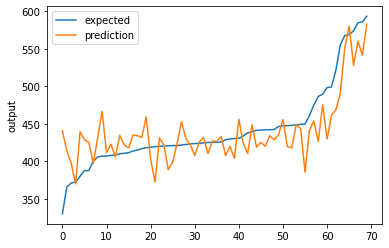

In [ ]:
pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
chart_regression(pred.flatten(),y_test,sort=True)

### As you can see, if we take 1 year's data, it performed poorly due to lack of data. So we need more data. To show that, I have taken the past 15 years data.

In [ ]:
tesla_data_1  = yf.download('TSLA',start='2005-12-08',end='2020-12-07',progress=False)

In [ ]:
tesla_data_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2020-11-30,602.210022,607.799988,554.510010,567.599976,567.599976,63003100
2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40382800
2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700


In [ ]:
data_set = tesla_data_1.copy()

In [ ]:
data_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2020-11-30,602.210022,607.799988,554.510010,567.599976,567.599976,63003100
2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40382800
2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700


In [ ]:
data_set.drop("Adj Close",axis = 1,inplace = True)
close_set=data_set[["Close"]]
encode_numeric_zscore(data_set,"Open")
encode_numeric_zscore(data_set,"Low")
encode_numeric_zscore(data_set,"High")
encode_numeric_zscore(data_set,"Volume")

In [ ]:
split_70 = int(len(data_set)* 0.70)
split_30 = len(data_set) - split_70
print(split_70)
print(split_30)
train = data_set[0:split_70]
test = data_set[split_70:len(data_set)]
train_close = close_set[0:split_70].values
test_close = close_set[split_70:len(data_set)].values

1840
789


In [ ]:
x_train,y_train = to_sequences(5,train,train_close)
x_test,y_test = to_sequences(5,test,test_close)

Streaming output truncated to the last 5000 lines.
 [ 0.21326177  0.22557993  0.23133831 74.06800079  3.27440727]
 [ 0.20440253  0.18748838  0.17619737 70.48999786  1.96612616]
 [ 0.17549741  0.17040444  0.17689331 71.09799957  0.96875529]] - [71.28199768]
201
[[ 0.15007082  0.23732661  0.15923487 75.91400146  4.39092853]
 [ 0.21326177  0.22557993  0.23133831 74.06800079  3.27440727]
 [ 0.20440253  0.18748838  0.17619737 70.48999786  1.96612616]
 [ 0.17549741  0.17040444  0.17689331 71.09799957  0.96875529]
 [ 0.19334096  0.17817873  0.18467857 71.28199768  0.77605682]] - [69.52799988]
202
[[ 0.21326177  0.22557993  0.23133831 74.06800079  3.27440727]
 [ 0.20440253  0.18748838  0.17619737 70.48999786  1.96612616]
 [ 0.17549741  0.17040444  0.17689331 71.09799957  0.96875529]
 [ 0.19334096  0.17817873  0.18467857 71.28199768  0.77605682]
 [ 0.18663402  0.16845473  0.179729   69.52799988  0.16020448]] - [67.73799896]
203
[[ 0.20440253  0.18748838  0.17619737 70.48999786  1.96612616]
 [ 0

In [ ]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm.hdf5", verbose=1, save_best_only=True)

In [ ]:

model = Sequential()

model.add(LSTM(128, dropout=0.1, recurrent_dropout=0.1, input_shape=(5, 5),return_sequences=True))

model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1,return_sequences=True))

model.add(Dense(32))

model.add(Dense(1, activation='softmax'))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor], verbose=2, epochs=100)

Epoch 1/100
58/58 - 1s - loss: 1277.7712 - accuracy: 0.0000e+00 - val_loss: 28463.3379 - val_accuracy: 0.0000e+00
Epoch 2/100
58/58 - 1s - loss: 1277.7712 - accuracy: 0.0000e+00 - val_loss: 28463.3379 - val_accuracy: 0.0000e+00
Epoch 3/100
58/58 - 1s - loss: 1277.7711 - accuracy: 0.0000e+00 - val_loss: 28463.3379 - val_accuracy: 0.0000e+00
Epoch 4/100
58/58 - 1s - loss: 1277.7712 - accuracy: 0.0000e+00 - val_loss: 28463.3379 - val_accuracy: 0.0000e+00
Epoch 5/100
58/58 - 1s - loss: 1277.7712 - accuracy: 0.0000e+00 - val_loss: 28463.3379 - val_accuracy: 0.0000e+00
Epoch 6/100
58/58 - 1s - loss: 1277.7710 - accuracy: 0.0000e+00 - val_loss: 28463.3379 - val_accuracy: 0.0000e+00
Epoch 00006: early stopping


In [ ]:
pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))

ValueError: ignored

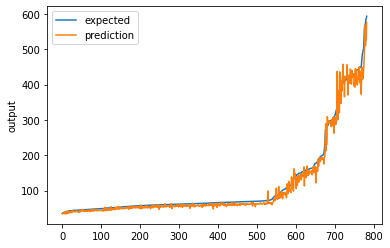

In [ ]:
chart_regression(pred.flatten(),y_test,sort=True)

## 4. 2.	Given the trend of the past 52-week stock price, do you think the stock you choose is worth buying now?
##  a.	What other information do you need to better answer this question? 
##  b.	Where do you think you can gather such information?

####A-	As we can see in image 1, we can see that the stock has seen a drastic change in the past 1 year. The growth has been exponential. By looking at this, it is not advisable to buy the stock at an all time high. It is advised to wait for a lower price. To get a better picture, I took the last 15 years data and used LSTM to predict the prices. From the above regression chart, we can see that, the prediction is very close and thus we can get an insight from this also.

####One can gather information from various sources:
####  - Company financial reports
####  - Reliable news 
####  - Social media outreach and response (Marketing Stats)
####  - Company and invester presence
####  - More data from previous years(Tentatively not more than 5 year old data)
####  - Collaborations, takeovers and investment in R&D
####  - After hour trading performance of the stock (rolling high and low)